/Users/lychee/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


The authority managed the most number of roads is: 
 local_authority_name    Highland
road_number                   65
Name: 31, dtype: object


Text(0.5, 1.0, 'The number of roads of different local authorities')

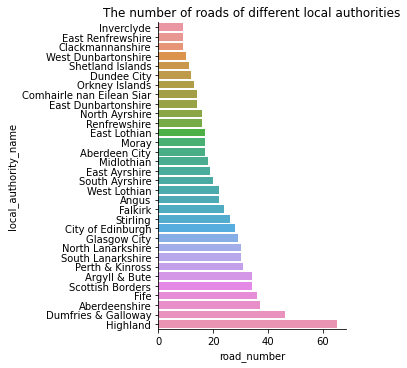

In [1]:
#Which local authorities manage the most number of different roads?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dft_rawcount_region_id_3.csv')
#find local authorities and the number of different roads they manage, covert to dataframe
road_managed = df.groupby(by='local_authority_name')['road_name'].nunique().reset_index()
#change the column name
road_managed.rename(columns={'road_name':'road_number'},inplace=True)
#create a new dataframe sorted by road_number
roads_managed = road_managed.sort_values(by=['road_number']).reset_index(drop=True)
#print the authority manages the most number of roads
print('The authority managed the most number of roads is: \n', roads_managed.iloc[-1])

r = sns.catplot(data=roads_managed,
                kind='bar',
                x='road_number',
                y='local_authority_name')
plt.title('The number of roads of different local authorities')

The five longest roads are: 
     road_name  count_point_number
490       A90                  59
491        A9                  66
492        A8                  76
493         C                 268
494         U                 528


Text(0.5, 1.0, 'The number of counting points of the five longest roads')

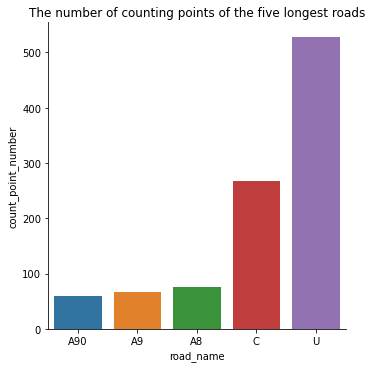

In [2]:
#Which road has the most number of different counting points along it (the longest)?

#find roads and the number of counting points they have, covert to dataframe
cp_road = df.groupby(by='road_name')['count_point_id'].nunique().reset_index()
#change the column name
cp_road.rename(columns={'count_point_id':'count_point_number'},inplace=True)
#create a new dataframe sorted by count_point_number
cps_road = cp_road.sort_values(by=['count_point_number']).reset_index(drop=True)
#print the road has the most number of counting points
print('The five longest roads are: \n', cps_road.iloc[-5:])

c = sns.catplot(data=cps_road.iloc[-5:],
                kind='bar',
                x='road_name',
                y='count_point_number')
plt.title('The number of counting points of the five longest roads')

In [3]:
#Excluding C-roads and U-roads, which have been the 5 busiest roads on average over the past 20 years, in terms of number of vehicles per day? 
#Is the answer different for pedal_cycles?

#Exclude C-roads and U-roads
df1 = df.copy()
df1.drop(df1.index[df1['road_name'] == 'U'], inplace = False)
df1.drop(df1.index[df1['road_name'] == 'C'], inplace = False)
#add a column representing all vehicles
df1['all_vehicles'] = df1['pedal_cycles'] + df1['all_motor_vehicles']
#the average number of all_vehicles on each road
all_v = df1.groupby(by='road_name')['all_vehicles'].mean()
#the average number of pedal_cycles on each road
bike_v = df1.groupby(by='road_name')['pedal_cycles'].mean()

print('In terms of all vehicles, the 5 busiest roads are: \n', all_v.nlargest(5))
print('In terms of pedal_cycles, the 5 busiest roads are: \n', bike_v.nlargest(5))

In terms of all vehicles, the 5 busiest roads are: 
 road_name
M8      3121.280142
A720    2173.899225
M73     2091.935897
A80     1734.357843
M80     1556.643939
Name: all_vehicles, dtype: float64
In terms of pedal_cycles, the 5 busiest roads are: 
 road_name
A900     16.108333
A700     15.729167
A9000     9.041667
B853      7.625000
B900      7.425926
Name: pedal_cycles, dtype: float64


The 5 authorities use bicycles most often are: 
   local_authority_name  pedal_cycles
0    City of Edinburgh      3.772920
1         Glasgow City      2.386596
2        Aberdeen City      2.033587
3          Dundee City      1.589574
4  West Dunbartonshire      1.108896


Text(0.5, 1.0, 'The average use of bikes per hour in different authorities')

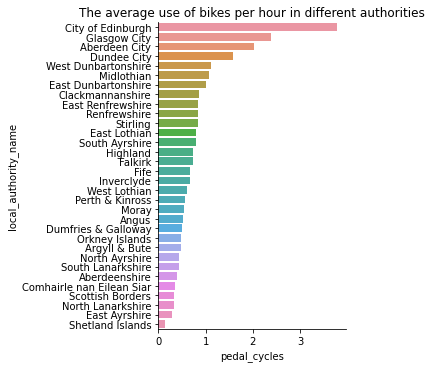

In [4]:
#the number of bikes used by different authorities and 5 authorities use bikes most often.

#the average use of bikes per hour in different authorities
local_bikes = df.pivot_table(index='local_authority_name')['pedal_cycles'].sort_values(ascending=False).reset_index()
print('The 5 authorities use bicycles most often are: \n', local_bikes[:5])

b = sns.catplot(data=local_bikes,
                kind='bar',
                x='pedal_cycles',
                y='local_authority_name')
plt.title('The average use of bikes per hour in different authorities')


The most likely time of the day to find a bicycle in City of Edinburgh is: 
 hour
17    1.568417
Name: pedal_cycles, dtype: float64


Text(0.5, 1.0, 'The average use of bikes each hour in City of Edinburgh')

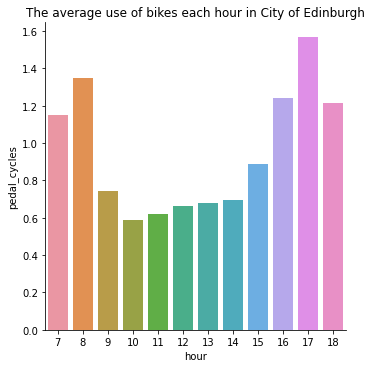

In [5]:
#What is the most likely time of the day to find a bicycle in City of Edinburgh? 

#select City of Edinburgh as a new dataframe
df1 = df.loc[df['local_authority_name'].isin(['City of Edinburgh'])]
#calculate the average pedal_cycles used per hour
bike_time = df.groupby(by='hour')['pedal_cycles'].mean()
print('The most likely time of the day to find a bicycle in City of Edinburgh is: \n', bike_time.nlargest(1))

bike_time = df.groupby(by='hour')['pedal_cycles'].mean().reset_index()
b = sns.catplot(data=bike_time,
                kind='bar',
                x='hour',
                y='pedal_cycles')
plt.title('The average use of bikes each hour in City of Edinburgh')

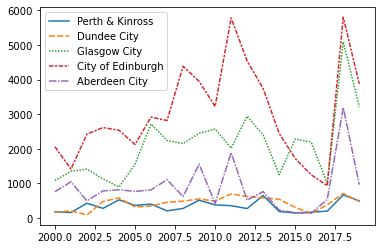

In [8]:
#stuck here
#the trend of bikes usage over the 20 years

#calculate the sum of bikes used in each authority each year
bike_usage = df.pivot_table(index='year', columns='local_authority_name', 
                            values='pedal_cycles', aggfunc=pd.Series.sum)

auth_bikes = [bike_usage['Perth & Kinross'],bike_usage['Dundee City'],bike_usage['Glasgow City'],bike_usage['City of Edinburgh'],bike_usage['Aberdeen City']]

bs = sns.lineplot(data=auth_bikes)